## Week7 - Tree Assignment

- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes)
- Use box plots to look at the data
- create a training and test set with random_state = 3
- train a decision tree model on the training set.
- train a logistic regression model on the training set
- train a random forest model on the training set
- Which model performed better?
- Which features were most relevant in each model (a part from random forest)?
- Use grid search to improve performance on the best performed model

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

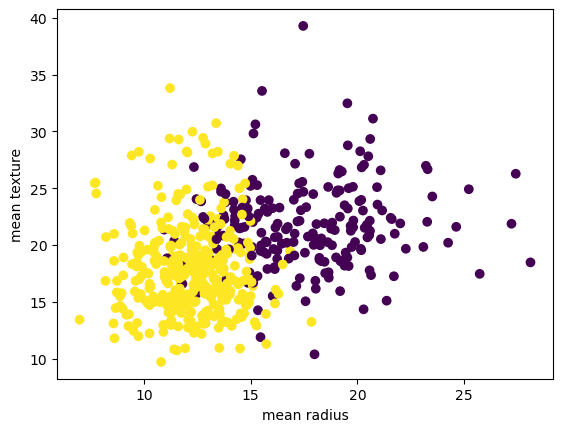

In [10]:
plt.scatter(data.data[:, 0], data.data[:, 1], c=data.target)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

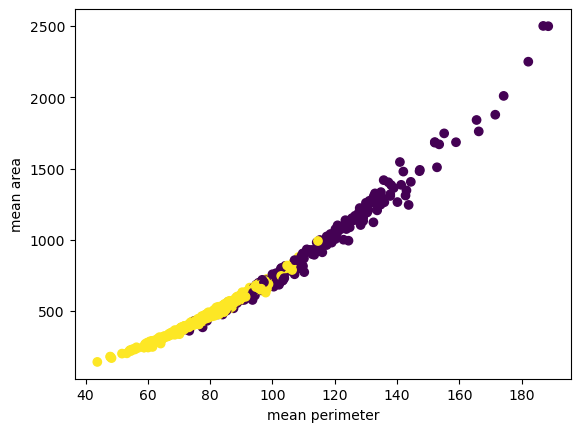

In [11]:
plt.scatter(data.data[:, 2], data.data[:, 3], c=data.target)
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.show()

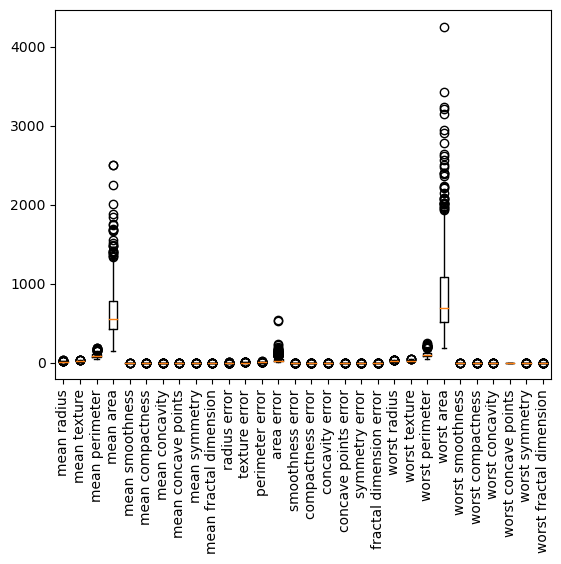

In [12]:
plt.boxplot(data.data)
plt.xticks(np.arange(len(data.feature_names))+1, data.feature_names, rotation=90)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=3)

# Decision Tree

In [14]:
yd = DecisionTreeClassifier(random_state=3)
yd.fit(X_train, y_train)
yd_pred = yd.predict(X_test)
yd_acc = accuracy_score(y_test, yd_pred)
yd_acc

0.9230769230769231

# Logistic Regression

In [15]:
yl = LogisticRegression(random_state=3)
yl.fit(X_train, y_train)
yl_pred = yl.predict(X_test)
yl_acc = accuracy_score(y_test, yl_pred)
yl_acc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9370629370629371

# Random Forest

In [16]:
yr = RandomForestClassifier(random_state=3)
yr.fit(X_train, y_train)
yr_pred = yr.predict(X_test)
yr_acc = accuracy_score(y_test, yr_pred)
yr_acc

0.9440559440559441

In [17]:
yd_imp = yd.feature_importances_
yl_coef = yl.coef_
yd_imp
yl_coef

array([[ 1.05316584,  0.50250196,  0.19623035, -0.01493175, -0.04885925,
        -0.19882345, -0.27796234, -0.11378716, -0.09024194, -0.01577552,
         0.02718591,  0.42522465,  0.15979624, -0.09257131, -0.00396657,
        -0.03659323, -0.05275163, -0.01346274, -0.01988656, -0.00294452,
         0.97114646, -0.53169436, -0.19425411, -0.01439802, -0.09204387,
        -0.63025286, -0.78176631, -0.22546583, -0.28359528, -0.06606906]])

In [19]:
para_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(yd, para_grid, cv=5)
grid_search.fit(X_train, y_train)
best_yd = grid_search.best_estimator_
best_yd_acc = accuracy_score(y_test, best_yd.predict(X_test))
best_yd_acc

0.9370629370629371